# **So Basically What is a Regression Problem ?**

Data scientists use many different kinds of machine learning algorithms to discover patterns in big data that lead to actionable insights. At a high level, these different algorithms can be classified into two groups based on the way they “learn” about data to make predictions: supervised and unsupervised learning.

It falls under supervised learning wherein the algorithm is trained with both input features and output labels

It helps in establishing a relationship among the variables by estimating how one variable affects the other.

A Regression Problem is when the output variable is a real or continuous value, such as “salary” or “weight”. Many different models can be used, the simplest is the linear regression. It tries to fit data with the best hyper-plane which goes through the points.



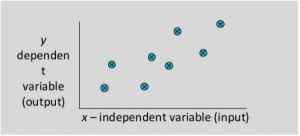

In [ ]:
# Necessary Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns 

In [ ]:
from sklearn.datasets import load_boston
data = load_boston() # Reading data

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

## **Data Description :-**

* **Data** :- Independent Variables also known as the x values.
* **feature_names** :- The column names of the data.
* **target** :- The target variable or the price of the houses(dependent variable) alse known as y value.

The Boston Housing Dataset is a derived from information collected by the U.S. Census Service concerning housing in the area of Boston MA. The following describes the dataset columns:

1. CRIM - per capita crime rate by town
2. ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
3. INDUS - proportion of non-retail business acres per town.
4. CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
5. NOX - nitric oxides concentration (parts per 10 million)
6. RM - average number of rooms per dwelling
7. AGE - proportion of owner-occupied units built prior to 1940
8. DIS - weighted distances to five Boston employment centres
9. RAD - index of accessibility to radial highways
10. TAX - full-value property-tax rate per $10,000
11. PTRATIO - pupil-teacher ratio by town

12. B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT - % lower status of the population
14. MEDV - Median value of owner-occupied homes in $1000's

In [ ]:
# Creating DataFrame

boston = pd.DataFrame(data.data, columns = data.feature_names)

In [ ]:
# Adding target value to the data

boston['MEDV'] = data.target

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [ ]:
boston.drop(["INDUS", "CHAS", "NOX", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"], axis=1).describe()


,CRIM,ZN,RM,AGE,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,6.284634,68.574901,22.532806
std,8.601545,23.322453,0.702617,28.148861,9.197104
min,0.006320,0.000000,3.561000,2.900000,5.000000
25%,0.082045,0.000000,5.885500,45.025000,17.025000
50%,0.256510,0.000000,6.208500,77.500000,21.200000
75%,3.677083,12.500000,6.623500,94.075000,25.000000
max,88.976200,100.000000,8.780000,100.000000,50.000000


In [ ]:
boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [ ]:
# Checking for Null Values and lloking at the output it seems there are no null values

boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

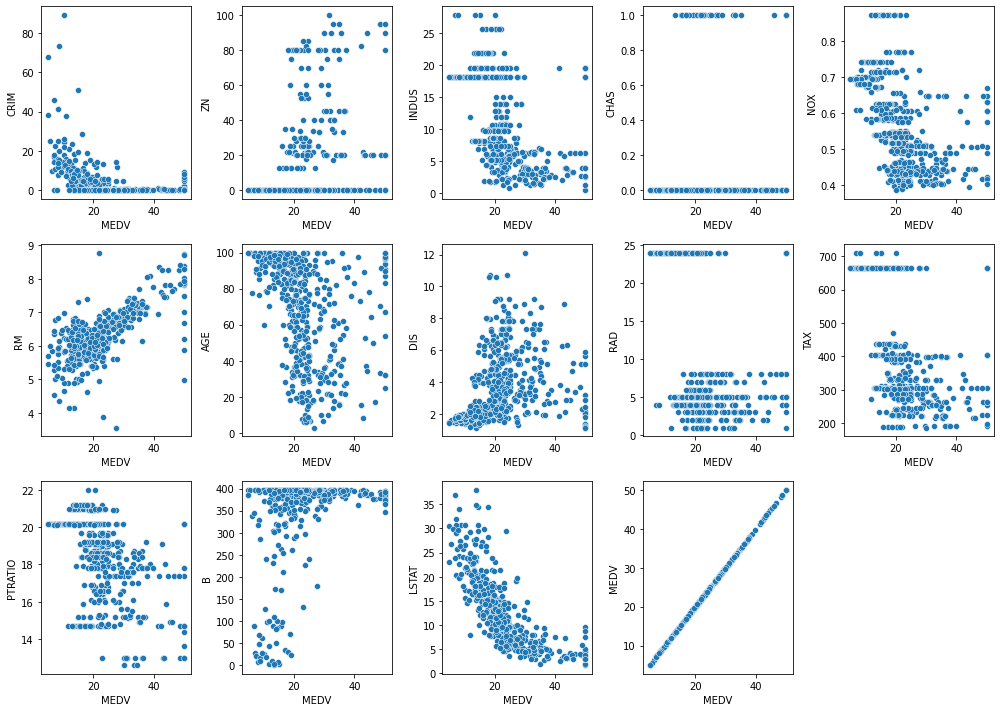

In [ ]:
# Comparing `Species` with all the remaining columns

plt.figure(figsize = (14, 10))
plotnumber = 1

for column in boston:
    if plotnumber <= 14:
        ax = plt.subplot(3, 5, plotnumber)
        sns.scatterplot(x = boston['MEDV'], y = boston[column])
        
    plotnumber += 1

plt.tight_layout()
plt.show()

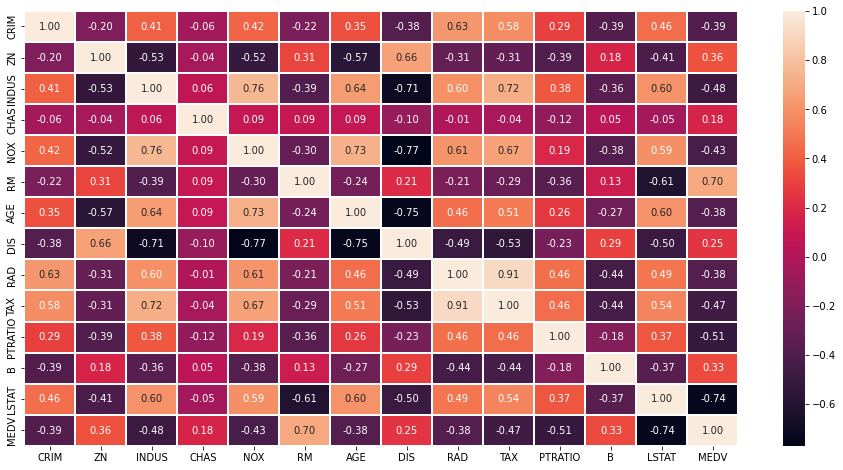

In [ ]:
fig, ax = plt.subplots(figsize = (16, 8))
sns.heatmap(boston.corr(), annot = True, fmt = '1.2f', annot_kws = {'size' : 10}, linewidth = 1)
plt.show()

In [ ]:
# From the above heatmap it's clear that 'RAD' and 'TAX' columns are very highly
# correlated, so we have to remove any one column

boston.drop(columns = 'RAD', axis = 1, inplace = True)

In [ ]:
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,222.0,18.7,396.90,5.33,36.2


In [ ]:
# Creating features and label variable

boston.drop(["NOX"], axis=1, inplace=True)
X = boston.drop(columns = 'MEDV', axis = 1)
y = boston['MEDV']

In [ ]:
# Splitting data into Training and Test Set

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Using StandardScaler to help scaling the data so as to reduce effect of outliers

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Linear Regression**

Linear Regression can be broadly classified into two categories.
* **Simple Linear Regression**: It’s the simplest form of Linear Regression that is used when there is a single input variable for the output variable.
* **Multiple Linear Regression**: It’s a form of linear regression that is used when there are two or more predictors.

**Disadvantages of Simple Linear Regression →** Running separate simple linear regressions will lead to different outcomes when we are interested in just one. Besides that, there may be an input variable that is itself correlated with or dependent on some other predictor. This can cause wrong predictions and unsatisfactory results.

This is where Multiple Linear Regression comes into the picture.
Mathematically…

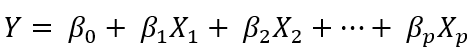

Here, Y is the output variable, and X terms are the corresponding input variables. Notice that this equation is just an extension of Simple Linear Regression, and each predictor has a corresponding slope coefficient (β).

The first β term (βo) is the intercept constant and is the value of Y in absence of all predictors (i.e when all X terms are 0). It may or may or may not hold any significance in a given regression problem. It’s generally there to give a relevant nudge to the line/plane of regression.

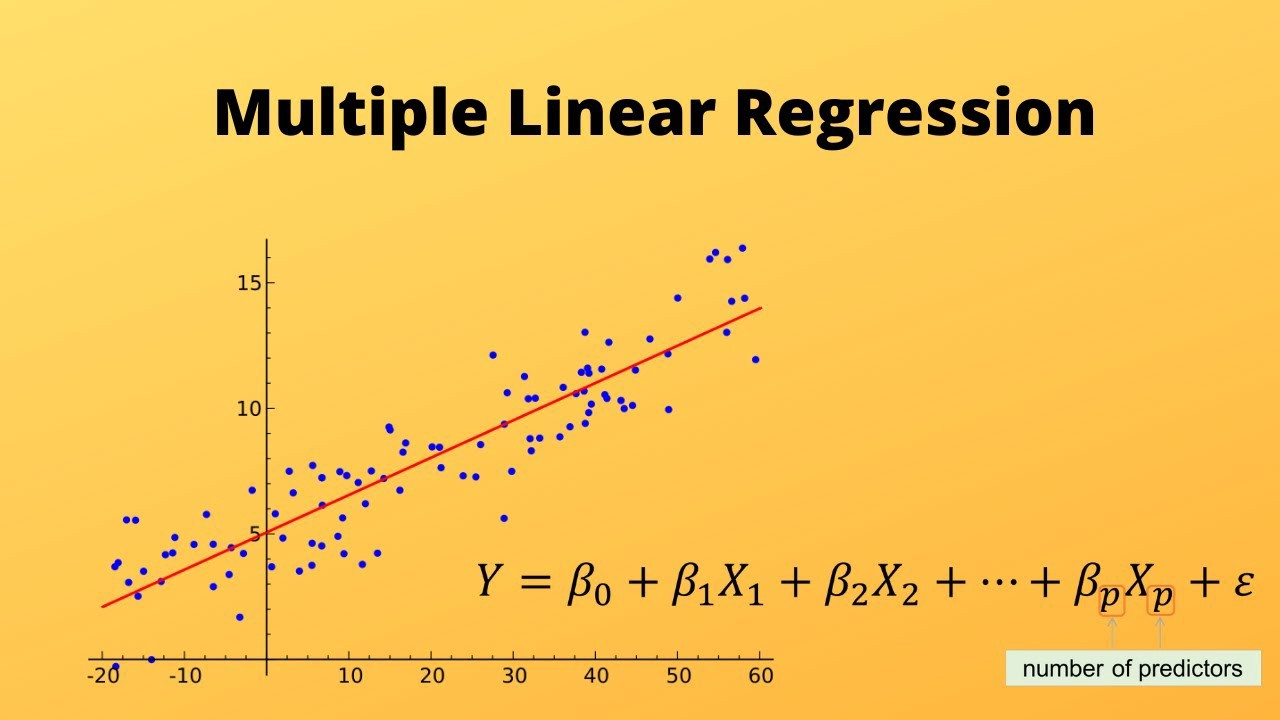


So we will be using Multiple Linear Regression as we have more than 2 features.



In [ ]:
# Using Multiple LinearRegression to Train and Fit the Data

from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test Set Results

y_pred = regressor.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
173,23.6,28.208609
274,32.4,35.313611
491,13.6,17.062509
72,22.8,24.600272
452,16.1,18.863065


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print("For Multiple Linear Regression !!!!!")

print('Mean Squared Error : ', mse)
print('R Square : ', r2)

For Multiple Linear Regression !!!!!
Mean Squared Error :  26.964454101594814
R Square :  0.6323051540564204


# **Polynomial Regresssion**

Polynomial Regression is a form of regression analysis in which the relationship between the independent variable x and the dependent variable y is modelled as an nth degree polynomial in x. Polynomial regression fits a nonlinear relationship between the value of x and the corresponding conditional mean of y, denoted E(y |x).

This is the general equation of a polynomial regression is:
Y = θo + θ₁X + θ₂X² + … + θₘXᵐ + residual error

polynomial regression on the data to fit a polynomial equation to it

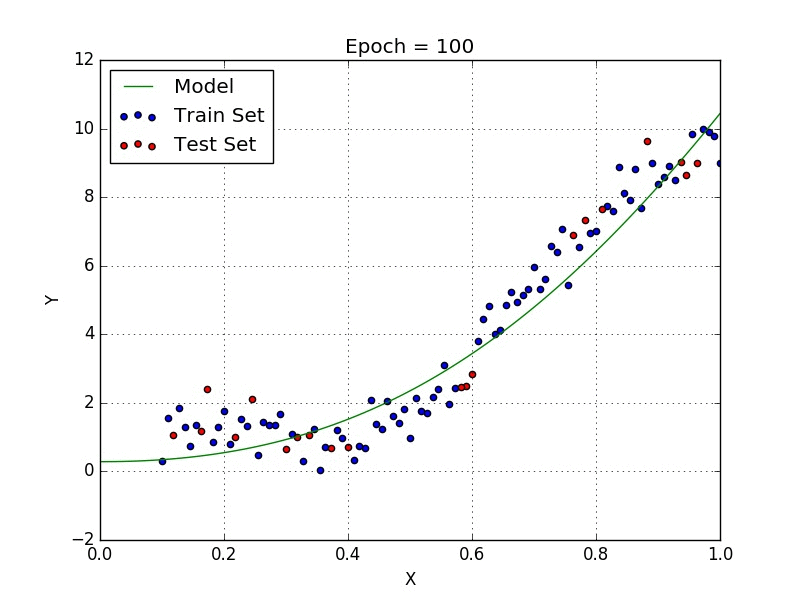

**Advantages of using Polynomial Regression:**
* Polynomial provides the best approximation of the relationship between the dependent and independent variable.
* A Broad range of function can be fit under it.
* Polynomial basically fits a wide range of curvature.

**Disadvantages of using Polynomial Regression:**
* The presence of one or two outliers in the data can seriously affect the results of the nonlinear analysis.
* These are too sensitive to the outliers.
* In addition, there are unfortunately fewer model validation tools for the detection of outliers in nonlinear regression than there are for linear regression.


In [ ]:
# Using Polynomial Regression to Train and Fit the Data

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

poly_reg = PolynomialFeatures(degree = 2)
X_poly = poly_reg.fit_transform(X_train)
poly_regressor = LinearRegression()
poly_regressor.fit(X_poly, y_train)

LinearRegression()

In [ ]:
# Predicting the Test Set Results

y_pred = poly_regressor.predict(poly_reg.transform(X_test))

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
173,23.6,26.511414
274,32.4,37.242981
491,13.6,17.089905
72,22.8,20.939575
452,16.1,15.781433


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print("For Polynomial Regression !!!!!")

print('Mean Squared Error : ', mse)
print('R Square : ', r2)

For Polynomial Regression !!!!!
Mean Squared Error :  15.137626114230528
R Square :  0.7935790919017975


# **Support Vector Regression**


The goal of the support vector machine method is to discover a hyperplane in an n-dimensional space, where n denotes the number of features or independent variables.

A margin of tolerance (epsilon) is supplied in the case of regression as an approximate estimate to the SVM that the issue would have already requested. Apart from that, there is a more challenging reason: the algorithm is more complex, thus it must be considered. However, the basic idea remains the same: to reduce error by customising the hyperplane to maximise the margin while keeping in mind.

Some important terms that are synonymous with the working of SVR are :



1. **Kernel:**
The function for converting a lower-dimensional data set to a higher-dimensional data set. A kernel aids in the search for a hyperplane in higher-dimensional space while reducing the computing cost. 
 
  When the size of the data grows larger, the computing cost usually rises. When we are unable to identify a separating hyperplane in a particular dimension and must shift to a higher dimension, this increase in dimension is necessary.


2. **Hyper Plane:**
This is the separating line between the data classes in SVM. Although, in SVR, we will describe it as a line that will assist us in predicting a continuous value or goal value. 

3. **Boundary line:** 
Other than Hyper Plane, there are two lines in SVM that produce a margin. The support vectors might be within or outside the boundary lines. The two classes are separated by this line. 
 
  The premise is the same in SVR. A decision boundary line can be conceived of as a demarcation line (for simplicity), with positive examples on one side and negative examples on the other. 
 
  The instances on this line can be characterised as either good or negative. The same SVM approach will be used in Support Vector Regression as well.

4. **Support vectors:** 
The data points closest to the border are listed here. The distance between the locations is little or negligible. Support vectors are locations that are outside the -tube in SVR. The smaller the value of, the more points outside the tube there are, and hence the more support vectors there are.

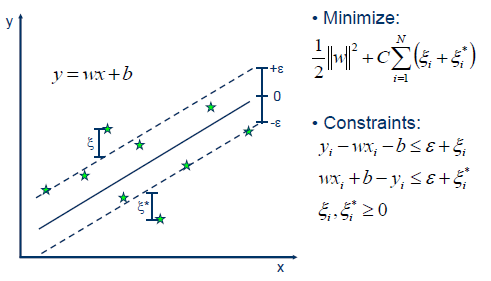


In [ ]:
# Using Polynomial Regression to Train and Fit the Data

from sklearn.svm import SVR

svr_regressor = SVR(kernel = 'rbf')
svr_regressor.fit(X_train, y_train)

SVR()

In [ ]:
# Predicting the Test Set Results

y_pred = svr_regressor.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
173,23.6,25.860061
274,32.4,27.924914
491,13.6,17.450623
72,22.8,23.080531
452,16.1,16.723379


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print("For Support Vector Regression !!!!!")

print('Mean Squared Error : ', mse)
print('R Square : ', r2)

For Support Vector Regression !!!!!
Mean Squared Error :  26.535511004400252
R Square :  0.6381543422301276


# **Decision Tree Regression**

Decision Tree is a decision-making tool that uses a flowchart-like tree structure or is a model of decisions and all of their possible results, including outcomes, input costs, and utility.

Decision-tree algorithm falls under the category of supervised learning algorithms. It works for both continuous as well as categorical output variables.

The branches/edges represent the result of the node and the nodes have either: 
* Conditions (Decision Nodes)
* Result (End Nodes)

The branches/edges represent the truth/falsity of the statement and take makes a decision

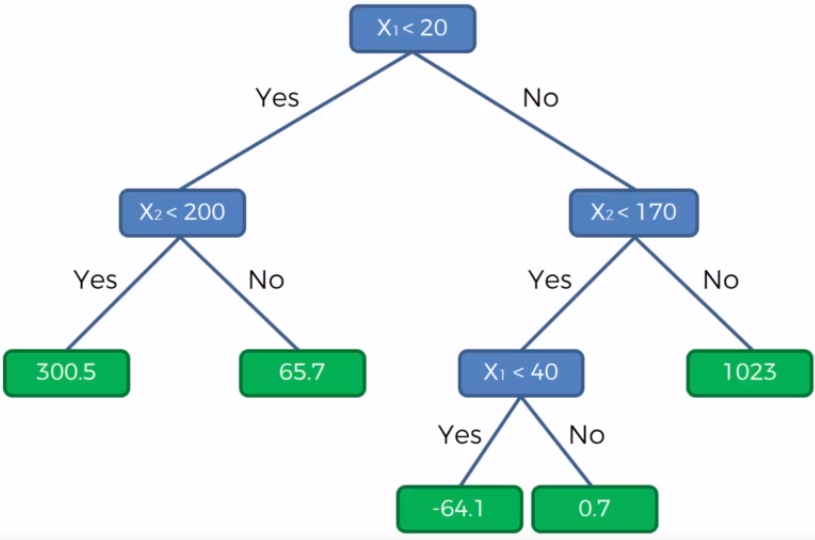

**Advantages:**
* Compared to other algorithms decision trees requires less effort for data preparation during pre-processing.
* A decision tree does not require normalization of data.
* A decision tree does not require scaling of data as well.
* Missing values in the data also do NOT affect the process of building a decision tree to any considerable extent.
* A Decision tree model is very intuitive and easy to explain to technical teams as well as stakeholders.

**Disadvantage:**
* A small change in the data can cause a large change in the structure of the decision tree causing instability.
* For a Decision tree sometimes calculation can go far more complex compared to other algorithms.
* Decision tree often involves higher time to train the model.
* Decision tree training is relatively expensive as the complexity and time has taken are more.
* The Decision Tree algorithm is inadequate for applying regression and predicting continuous values.


In [ ]:
# Using Decision Tree Regression to Train and Fit the Data

from sklearn.tree import DecisionTreeRegressor

tree_regressor = DecisionTreeRegressor(random_state=42)
tree_regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [ ]:
# Predicting the Test Set Results

y_pred = regressor.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
173,23.6,28.208609
274,32.4,35.313611
491,13.6,17.062509
72,22.8,24.600272
452,16.1,18.863065


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print("For Decision Trees Regression !!!!!")

print('Mean Squared Error : ', mse)
print('R Square : ', r2)

For Decision Trees Regression !!!!!
Mean Squared Error :  26.964454101594814
R Square :  0.6323051540564204


# **Random Forest Regression**

A Random Forest is a collection of Decision Trees, Each Tree independently makes a prediction, the values are then averaged (Regression) / Max voted (Classification) to arrive at the final value.

The strength of this model lies in creating different trees with different sub-features from the features. The Features selected for each tree is Random, so the trees do not get deep and are focused only on the set of features.

Finally, when they are put together, we create an ensemble of Decision Trees that provides a well-learned prediction.

Each of the decision tree would independently decide based on its own subset of data and features, so the results would not be similar.

Each tree would have 3 major nodes
* Root Node
* Leaf Node
* Decision Node

The node where the final decision is made is called ‘Leaf Node. The function to decide is made in the ‘Decision Node’, the ‘Root Node’ is where the data is stored.

**Advantages :**
* It reduces overfitting in decision trees and helps to improve the accuracy
* It is flexible to both classification and regression problems
* It works well with both categorical and continuous values
* It automates missing values present in the data
* Normalising of data is not required as it uses a rule-based approach.

**Disadvantages :**
* It requires much computational power as well as resources as it builds numerous trees to combine their outputs. 
* It also requires much time for training as it combines a lot of decision trees to determine the class.
* Due to the ensemble of decision trees, it also suffers interpretability and fails to determine the significance of each variable.


   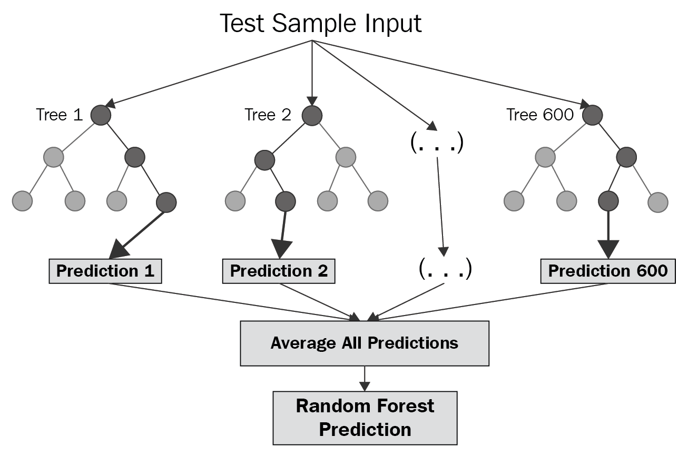



In [ ]:
# Using Random Forest Regression to Train and Fit the Data

from sklearn.ensemble import RandomForestRegressor

forest_regressor = RandomForestRegressor(n_estimators=10, random_state=42)
forest_regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=42)

In [ ]:
# Predicting the Test Set Results

y_pred = forest_regressor.predict(X_test)

In [ ]:
# Seeing how our Predicted Values are comapared to real values

compare = pd.DataFrame({"Real Values":y_test, "Predicted Values": y_pred})
compare.head() # Seeing the First 5 rows

,Real Values,Predicted Values
173,23.6,22.13
274,32.4,30.58
491,13.6,17.02
72,22.8,23.07
452,16.1,15.65


In [ ]:
# Evaluating the Performance of our Model

from sklearn.metrics import r2_score, mean_squared_error

r2 = r2_score(y_test,y_pred)
mse = mean_squared_error(y_test,y_pred)

In [ ]:
print("For Random Forest Regression !!!!!")

print('Mean Squared Error : ', mse)
print('R Square : ', r2)

For Random Forest Regression !!!!!
Mean Squared Error :  10.974757843137251
R Square :  0.8503451292135831
